<a href="https://colab.research.google.com/github/Mahima-2111/Play-Store-App-Review-Analysis/blob/main/_AlmaBetter_Mahima_Shree_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
play_store = pd.read_csv('/content/drive/MyDrive/Capstone_Project-1/Play Store Data.csv')

In [4]:
user_reviews = pd.read_csv('/content/drive/MyDrive/Capstone_Project-1/User Reviews.csv')

In [ ]:
play_store.shape

(10841, 13)

In [ ]:
user_reviews.shape

(64295, 5)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
user_reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [9]:
play_store['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [8]:
user_reviews['App'].unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [ ]:
user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_reviews.shape

(64295, 5)

In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


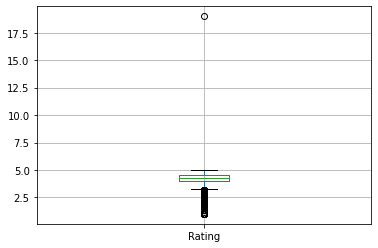

In [ ]:
play_store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faeb895fed0>]],
      dtype=object)

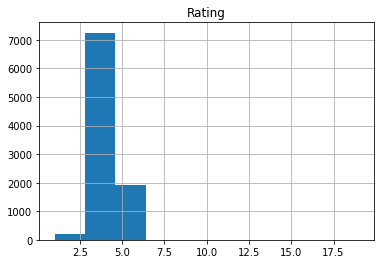

In [ ]:
play_store.hist()

**MISSING VALUES**

Count the number of missing values in the dataframe

In [ ]:
play_store.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
play_store.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

**Checking how many ratings are more than 5 i.e Outliers**

In [ ]:
play_store[play_store.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
play_store.drop([10472],inplace = True)

In [ ]:
play_store[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


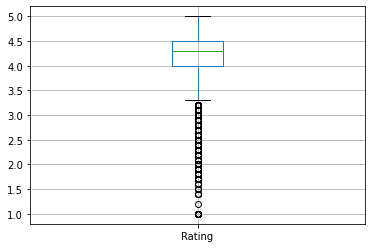

In [ ]:
play_store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faeb792e090>]],
      dtype=object)

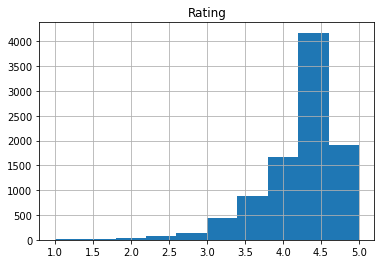

In [ ]:
play_store.hist()

When in any column 90% of data is missing then we should ignore that column, But this is not the case in this data,but still for a check.

In [ ]:
threshold = len(play_store) * 0.1

In [ ]:
threshold

1084.0

In [ ]:
play_store.dropna(thresh=threshold,axis=1,inplace=True) # Row -> axis = 0 ; Column -> axis = 1

In [ ]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
play_store.shape

(10840, 13)

**Data Imputation & Data Manipulation**

Filling the Null values with the appropriate values using aggregate functions such as Mean,Median,Mode

In [ ]:
# Defining the function to fill the null values with the median.
def impute_median(series):
  return series.fillna(series.median())

In [ ]:
play_store.Rating = play_store['Rating'].transform(impute_median)

In [ ]:
# Count the number of values in each column
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# Mode of categorical values
print(play_store['Type'].mode())
print(play_store['Current Ver'].mode())
print(play_store['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
# Filling the missing categorical values with Mode
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Counting the number of null values in each column
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
# Converting Price,Reviews,Ratings into numerical values
play_store['Price'] = play_store['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
play_store['Price'] = play_store['Price'].apply(lambda x : float(x))
play_store['Reviews'] = pd.to_numeric(play_store['Reviews'],errors='coerce')

In [ ]:
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : float(x))

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Creating category for categorical data
grp = play_store.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

**Data Visualization**

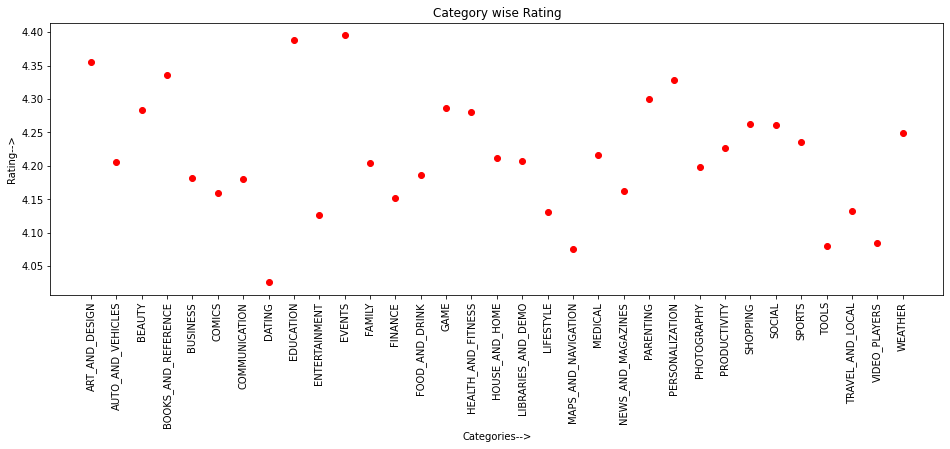

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,ro')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

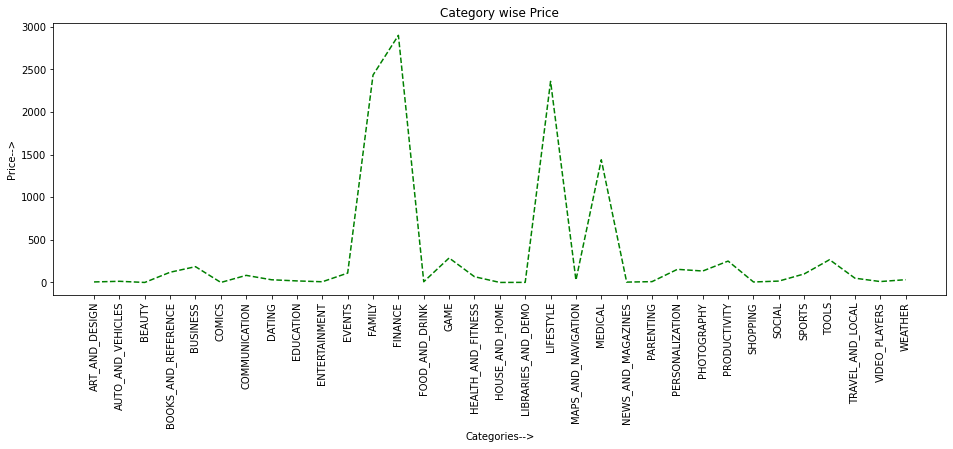

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Price')
plt.xlabel('Categories-->')
plt.ylabel('Price-->')
plt.show()

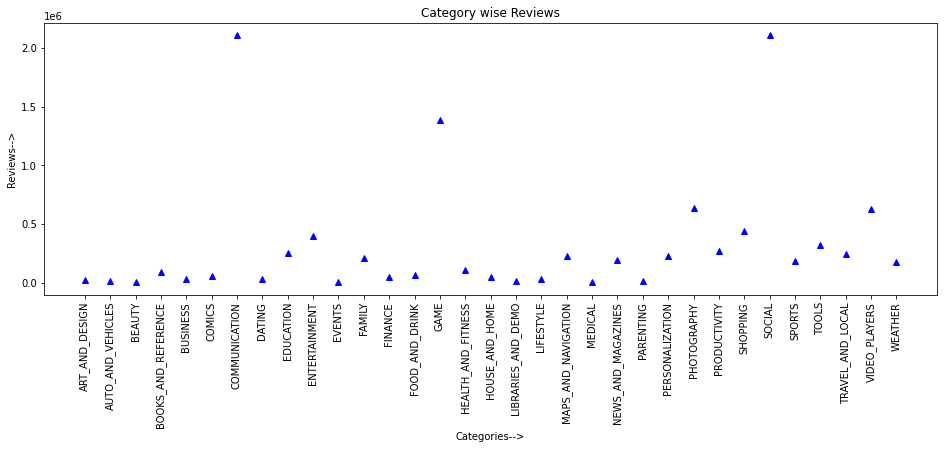

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'g^',color='b')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

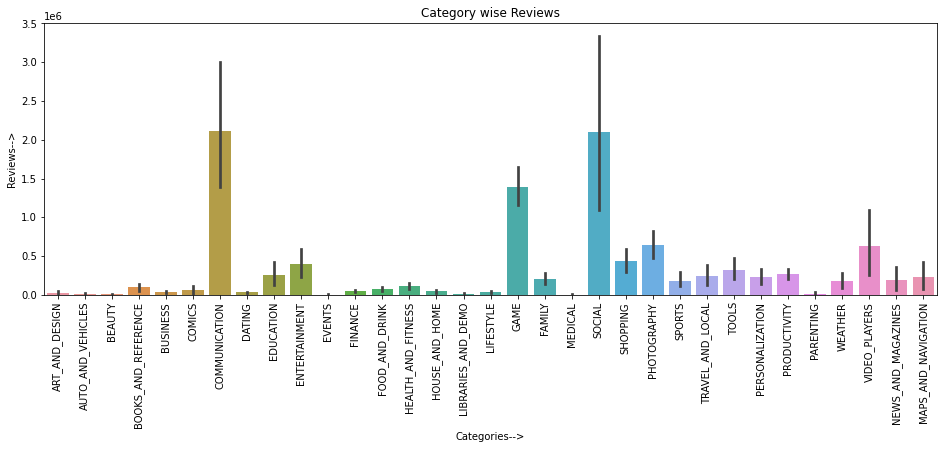

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=play_store['Category'],y=play_store['Reviews'])
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

It would be interesting to find out the distribution of the Ratings , Reviews and Price separately. We can see that **Ratings is postively skewed, whereas Reviews and Price are heavily skewed to the less hand side**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

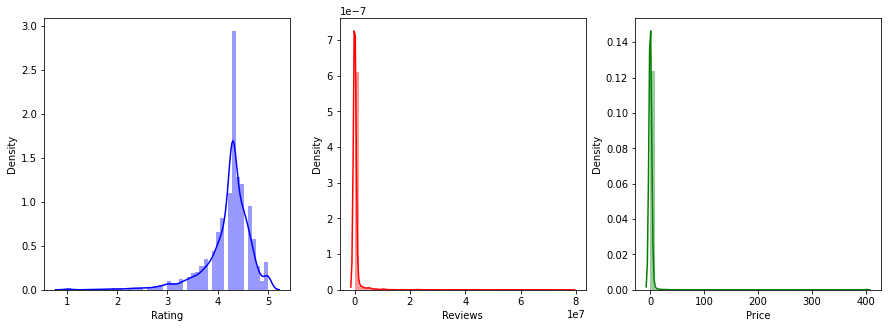

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.distplot(play_store['Rating'],hist=True,color='b',ax=ax1)
sns.distplot(play_store['Reviews'],hist=True,color='r',ax=ax2)
sns.distplot(play_store['Price'],hist=True,color='g',ax=ax3)
f.set_size_inches(15, 5)

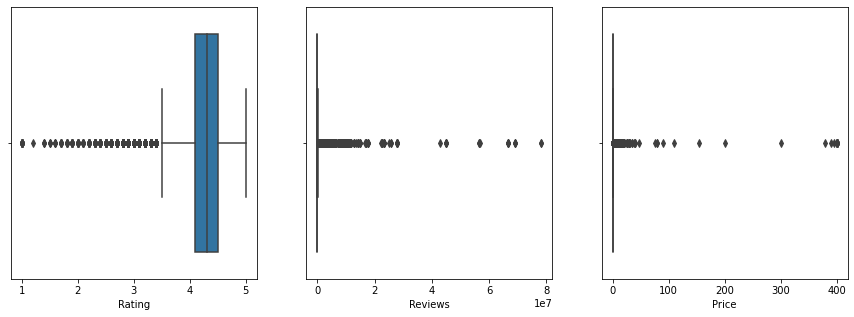

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=play_store,ax=ax1)
sns.boxplot(x='Reviews',data=play_store,ax=ax2)
sns.boxplot(x='Price',data=play_store,ax=ax3)
f.set_size_inches(15, 5)

We can see that ***most of the Ratings are between 4 and around 4.5 and 5***.

As far as Reviews are concerned, ***most of the count of the reviews are around 0***

Also for Price, **most of the Apps are Free I guess, we can check this using the Type column**

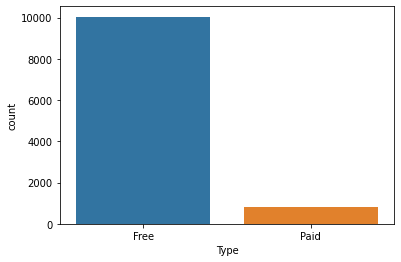

In [ ]:
sns.countplot(x='Type',data=play_store)

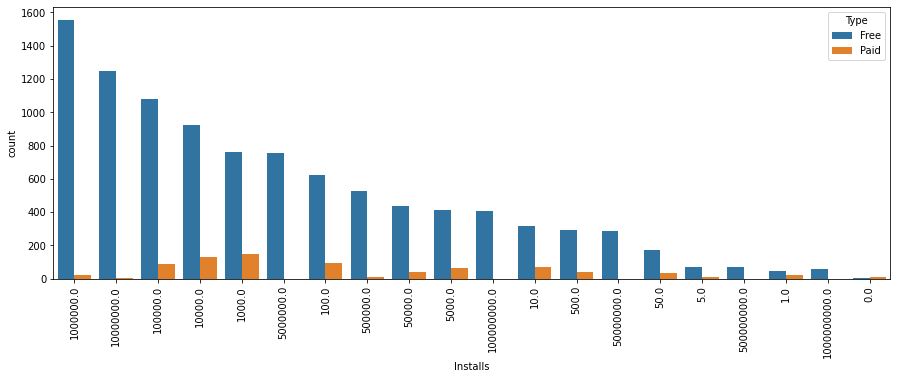

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot(x = 'Installs',hue='Type',data=play_store,ax=ax1,order=play_store['Installs'].value_counts().index)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

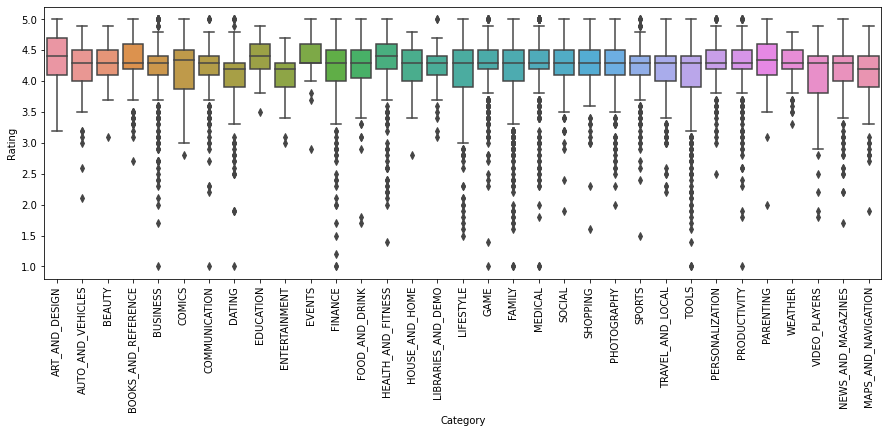

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=play_store)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

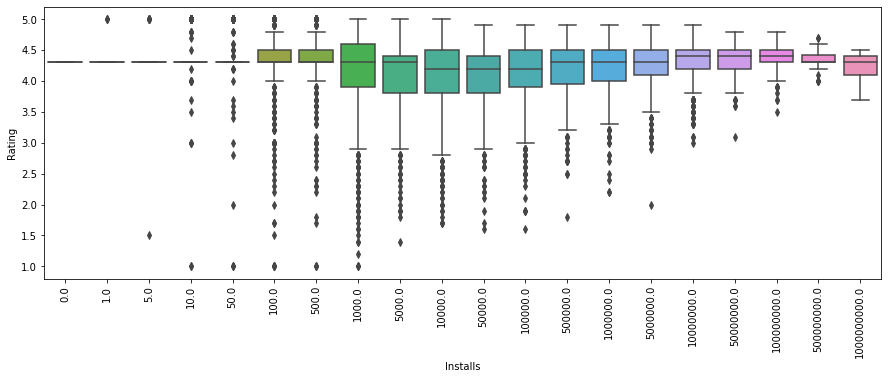

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=play_store)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

Well, it would be interesting to see if there is any relationship between Ratings vs Reviews. Does more number of reviews means more ratings?

**From the below plot, we cannot say that there is a relation, it seems that irrespective of the Reviews, the ratings are majorly between 4 and 5**, which we also noticed before

Also it is not correct to assume that rating and reviews have a relationship because reviews can be positive or negative and increase in the number of reviews does not show whether the reviews are positive or negative.

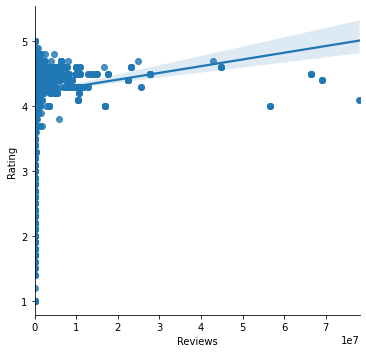

In [ ]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=play_store)

It will be interesting to see if **size is also one of the factors for installs**, because if the App is very heavy, may be people will be hesistant and it would slow down their phone or whatsoever. Let's check if the assumption is supported by the data

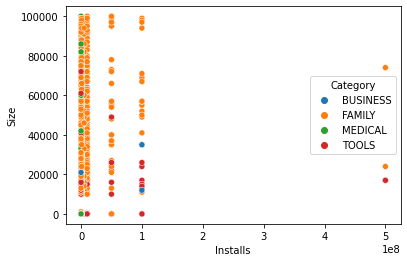

In [ ]:
g = sns.scatterplot(y='Size',x='Installs',hue = 'Category',data=play_store[play_store['Category'].isin(['FAMILY','GAMES','TOOLS','BUSINESS','MEDICAL'])])

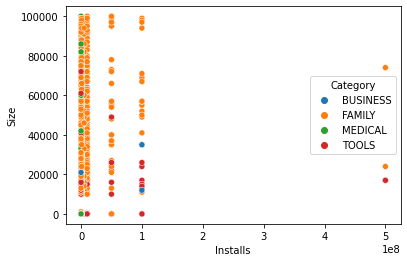

In [ ]:
g = sns.scatterplot(y='Size',x='Installs',hue = 'Category',data=play_store[play_store['Category'].isin(['FAMILY','GAMES','TOOLS','BUSINESS','MEDICAL'])])

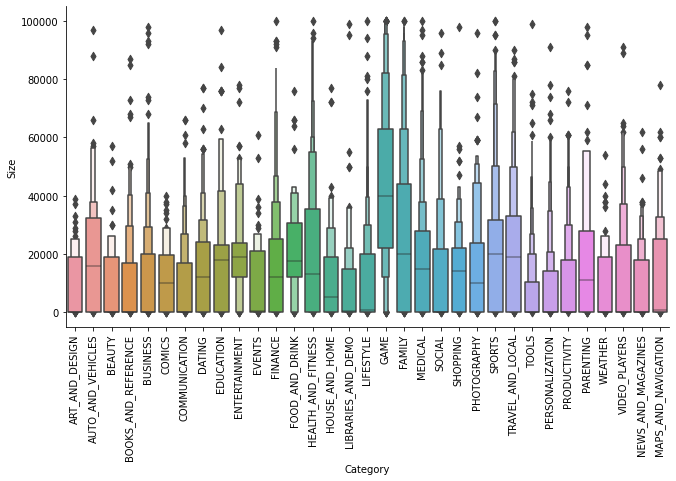

In [ ]:
g = sns.catplot(x = 'Category',y='Size',kind='boxen',data=play_store,height=5,aspect=2)
g.set_xticklabels(rotation=90)

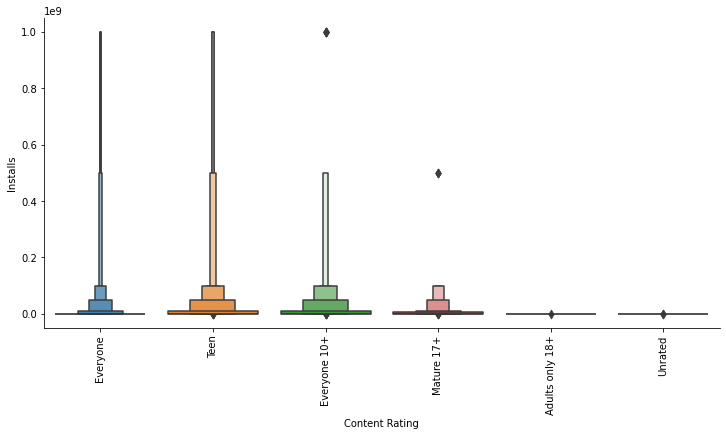

In [ ]:
g = sns.catplot(x = 'Content Rating',y='Installs',kind='boxen',data=play_store,height=5,aspect=2)
g.set_xticklabels(rotation=90)

In [ ]:
from wordcloud import WordCloud

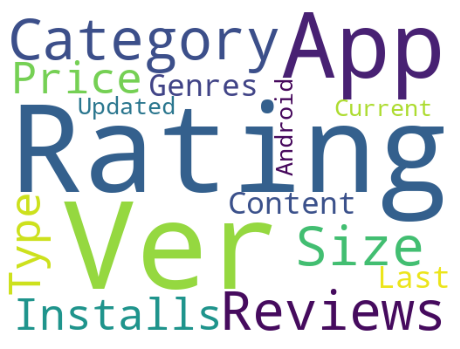

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(play_store))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

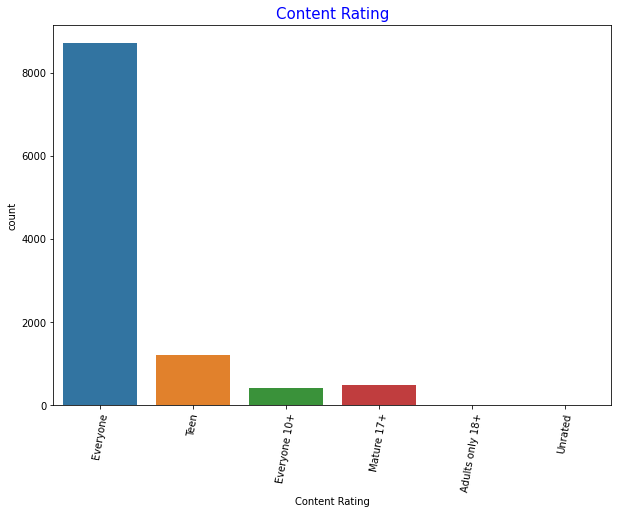

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=play_store, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

**Category**

In [ ]:
play_store['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

**Rating**

In [ ]:
play_store['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
play_store['Rating'].dtype

dtype('float64')

**Reviews**

In [ ]:
play_store[play_store['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
play_store['Reviews'] = play_store.Reviews.replace("0.0",0)
play_store['Reviews'] = play_store.Reviews.replace("3.0M",3000000.0)
play_store['Reviews'] = play_store['Reviews'].astype(float)
play_store['Reviews'].dtype

dtype('float64')

**Size**

In [ ]:
play_store['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
play_store['Size'] = play_store.Size.replace("Varies with device",np.nan)
play_store['Size'] = play_store.Size.str.replace("M","000")
play_store['Size'] = play_store.Size.str.replace("k","")
play_store['Size'] = play_store.Size.replace("1,000+",1000)
play_store['Size'] =play_store['Size'].astype(float)
play_store['Size'].dtype

dtype('float64')

**Installs**

In [ ]:
play_store['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [ ]:
play_store['Installs'] = play_store.Installs.replace("Free",np.nan)
play_store['Installs'] = play_store['Installs'].astype(float)
play_store['Installs'].dtype

dtype('float64')

**Price**

In [ ]:
play_store['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
play_store['Price'].dtype

dtype('float64')

**Last Updated**

In [ ]:
play_store['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
play_store['Last Updated'] = pd.to_datetime(play_store['Last Updated'])
play_store['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
play_store.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.064565,0.045496,-0.019318
Reviews,0.063166,1.000000,0.233791,0.643122,-0.009667
Size,0.064565,0.233791,1.000000,0.164608,-0.022772
Installs,0.045496,0.643122,0.164608,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.022772,-0.011689,1.000000


In [ ]:
play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.480342,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [ ]:
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
user_reviews['App'].unique

<bound method Series.unique of 0              10 Best Foods for You
1              10 Best Foods for You
2              10 Best Foods for You
3              10 Best Foods for You
4              10 Best Foods for You
                    ...             
64290    Houzz Interior Design Ideas
64291    Houzz Interior Design Ideas
64292    Houzz Interior Design Ideas
64293    Houzz Interior Design Ideas
64294    Houzz Interior Design Ideas
Name: App, Length: 64295, dtype: object>

In [ ]:
user_reviews.shape

(64295, 5)

In [ ]:
# Removing the missing values
user_reviews.dropna(inplace=True)

In [ ]:
user_reviews.shape

(37427, 5)

In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
